In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import ast

In [2]:
df = pd.read_csv("CleanData.csv", parse_dates=True)
df

,Ward Name,Street Name,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price
0,Phường Hòa Khánh Nam,Đường Hoàng Văn Thái,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,['1 Part Residential'],165000000
1,Phường Hòa Phát,Vũ lăng,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,"['No Residential', 'Back Expansion', '1 Part R...",250000000
2,Phường Hòa Khánh Bắc,Âu cơ,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,"['No Residential', 'Back Expansion']",250000000
3,Phường Hòa Khánh Nam,Đường Nam Cao,108.150030,16.066383,75.0,5.0,15.0,4,6,4.0,['No Residential'],280000000
4,Xã Hòa Tiến,DT605,108.172516,15.972230,153.0,5.0,30.0,1,1,5.0,"['Frontage', '1 Part Residential']",415000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,Phường Thọ Quang,Đường Ngô Quyền,108.247270,16.101212,90.0,5.0,18.0,1,1,1.0,['1 Part Residential'],5680000000
2511,Phường Khuê Trung,Đường Bùi Kỷ,108.210396,16.033638,100.0,5.0,20.0,1,1,2.0,['Frontage'],5800000000
2512,Phường Hòa An,Đường Bắc Sơn,108.179695,16.046282,125.0,5.0,25.0,1,1,5.0,['Frontage'],6300000000
2513,Phường Hòa Khánh Nam,Trần doan nghiep,108.148796,16.053411,98.0,5.0,19.0,1,1,1.0,"['Frontage', 'No Residential']",7500000000


In [3]:
def convert_to_list(value):
    if isinstance(value, str): 
        try:
            return ast.literal_eval(value)  
        except:
            return [value.strip()]  
    elif isinstance(value, list):
        return value 
    else:
        return [] 

### One-hot encoding 

In [4]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_columns = encoder.fit_transform(df[["Ward Name", "Street Name"]])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["Ward Name", "Street Name"]))

df_final = df.drop(columns=["Ward Name", "Street Name"]).join(encoded_df)

df_final.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price,...,Street Name_Đồng trí 8,Street Name_Đồng xoài,Street Name_Đỗ Chính,Street Name_điện ngọc,Street Name_đường 5,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4
0,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,['1 Part Residential'],165000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,"['No Residential', 'Back Expansion', '1 Part R...",250000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,"['No Residential', 'Back Expansion']",250000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,108.150030,16.066383,75.0,5.0,15.0,4,6,4.0,['No Residential'],280000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108.172516,15.972230,153.0,5.0,30.0,1,1,5.0,"['Frontage', '1 Part Residential']",415000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df["Property Features"] = df["Property Features"].apply(convert_to_list)
mlb = MultiLabelBinarizer()

features_encoded = mlb.fit_transform(df["Property Features"])

df_features = pd.DataFrame(features_encoded, columns=mlb.classes_)
df = df.drop(columns=["Property Features"]).reset_index(drop=True)
df_final = df_final.drop(columns=["Property Features"]).reset_index(drop=True)
df = pd.concat([df_final, df_features], axis=1)


df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,165000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,108.150030,16.066383,75.0,5.0,15.0,4,6,4.0,280000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,108.172516,15.972230,153.0,5.0,30.0,1,1,5.0,415000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


## Feature Transformation

### Normalize by taking the inverse method

In [6]:
columns_to_inverse = ["Price", "Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_inverse_transformed = df.copy() 
df_inverse_transformed[columns_to_inverse] = 1 / df_inverse_transformed[columns_to_inverse]
df_inverse_transformed[columns_to_inverse].head()

,Price,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,6.060606e-09,0.009246,0.062290,0.009804,0.2,0.043478
1,4.000000e-09,0.009244,0.062388,0.010000,0.2,0.050000
2,4.000000e-09,0.009248,0.062200,0.010000,0.2,0.050000
3,3.571429e-09,0.009246,0.062242,0.013333,0.2,0.066667
4,2.409639e-09,0.009244,0.062609,0.006536,0.2,0.033333


### Normalize using Arcsine method

In [7]:
columns_to_asinh = ["Price", "Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_asinh_transformed = df.copy()
df_asinh_transformed[columns_to_asinh] = np.arcsinh(df_asinh_transformed[columns_to_asinh])
df_asinh_transformed[columns_to_asinh].head()

,Price,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,19.614603,5.376764,3.470067,5.318144,2.312438,3.829114
1,20.030119,5.376896,3.468502,5.298342,2.312438,3.689504
2,20.030119,5.376567,3.471506,5.298342,2.312438,3.689504
3,20.143447,5.376688,3.470843,5.010680,2.312438,3.402307
4,20.536936,5.376896,3.464977,5.723596,2.312438,4.094622


### Normalization using Z-score method

In [8]:
columns_to_zScore = ["Price", "Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
std_scaler_zScore = StandardScaler()
df_std_scaled_zScore = std_scaler_zScore.fit_transform(df[columns_to_zScore])
df_std_scaled_zScore = pd.DataFrame(df_std_scaled_zScore, columns=columns_to_zScore)
df_std_scaled_zScore[columns_to_zScore].head()

,Price,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,-2.310335,-1.012703,0.584765,0.200632,0.0,0.932769
1,-2.252332,-0.698373,-0.044172,0.087929,0.0,0.086461
2,-2.252332,-1.483338,1.164166,0.087929,0.0,0.086461
3,-2.231861,-1.194514,0.897208,-1.320852,0.0,-1.324053
4,-2.139739,-0.698373,-1.457129,3.074545,0.0,2.907489


### Normalize using Logarithmic method

In [9]:
columns_to_log = ["Price", "Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_log_transformed = df.copy()
df_log_transformed = df[columns_to_log].apply(np.log1p)
df_log_transformed = pd.DataFrame(df_log_transformed, columns=columns_to_log)
df_log_transformed[columns_to_log].head()

,Price,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,18.921456,4.692799,2.836378,4.634729,1.791759,3.178054
1,19.336971,4.692929,2.834902,4.615121,1.791759,3.044522
2,19.336971,4.692603,2.837736,4.615121,1.791759,3.044522
3,19.450300,4.692723,2.837111,4.330733,1.791759,2.772589
4,19.843789,4.692929,2.831578,5.036953,1.791759,3.433987


### Normalize using square root method

In [10]:
columns_to_sqrt = ["Price", "Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_sqrt_transformed = df.copy()
df_sqrt_transformed = df[columns_to_sqrt].apply(np.sqrt)
df_sqrt_transformed = pd.DataFrame(df_sqrt_transformed, columns=columns_to_sqrt)
df_sqrt_transformed[columns_to_sqrt].head()

,Price,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,12845.232579,10.399917,4.006730,10.099505,2.236068,4.795832
1,15811.388301,10.400602,4.003590,10.000000,2.236068,4.472136
2,15811.388301,10.398891,4.009621,10.000000,2.236068,4.472136
3,16733.200531,10.399521,4.008289,8.660254,2.236068,3.872983
4,20371.548787,10.400602,3.996527,12.369317,2.236068,5.477226


### Data verification

*Histogram comparing the variable Price before and after normalization*

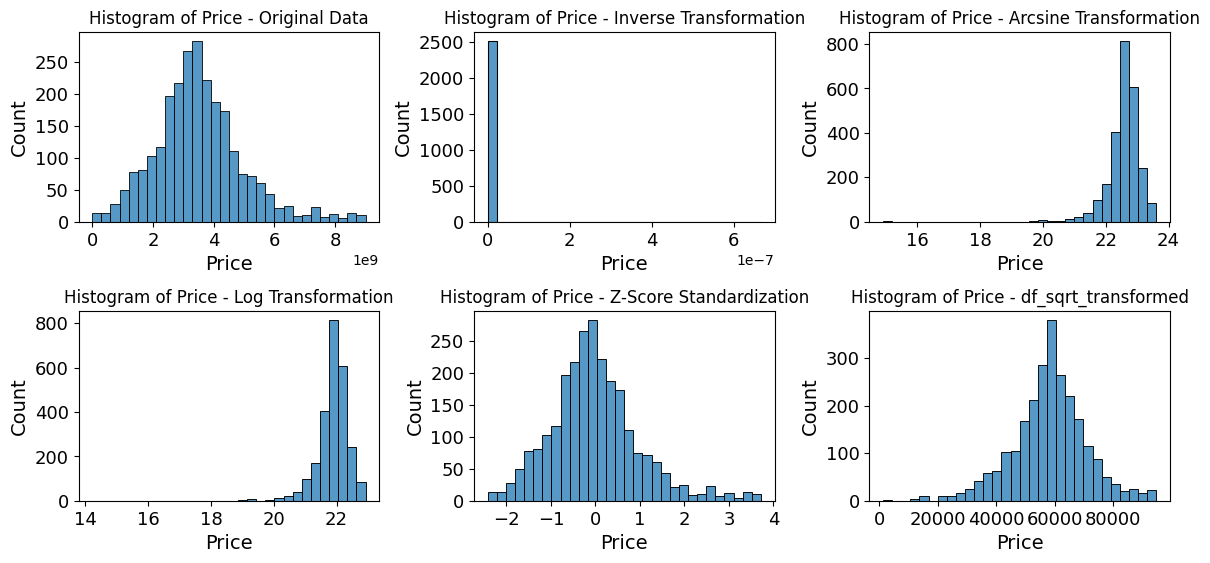

In [11]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']
plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    sns.histplot(data=data['Price'], bins=30)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('Price', fontsize = 14)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.title(f'Histogram of Price - {method}')
    plt.tight_layout()

plt.show()

*Histogram comparing the variable Area (m²) before and after normalization*

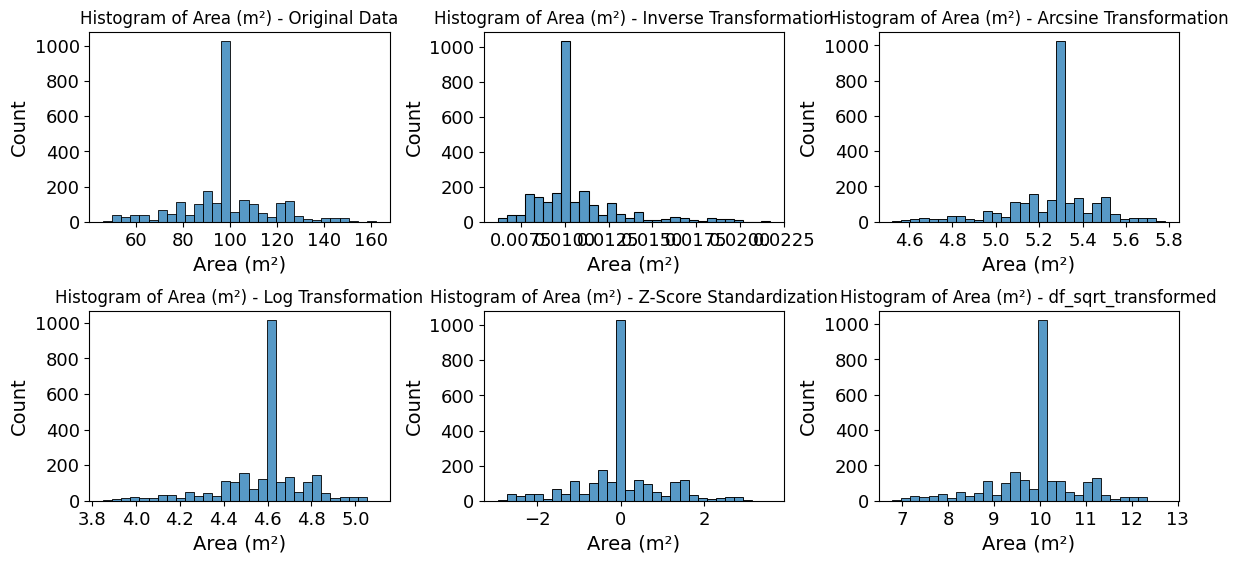

In [12]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']
plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    sns.histplot(data=data['Area (m²)'], bins=30)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('Area (m²)', fontsize = 14)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.title(f'Histogram of Area (m²) - {method}')
    plt.tight_layout()

plt.show()

*Use probability graph to verify whether the transformed data follows the normal distribution*

- Comparison of the distribution of the *Price* feature when applying normalization methods

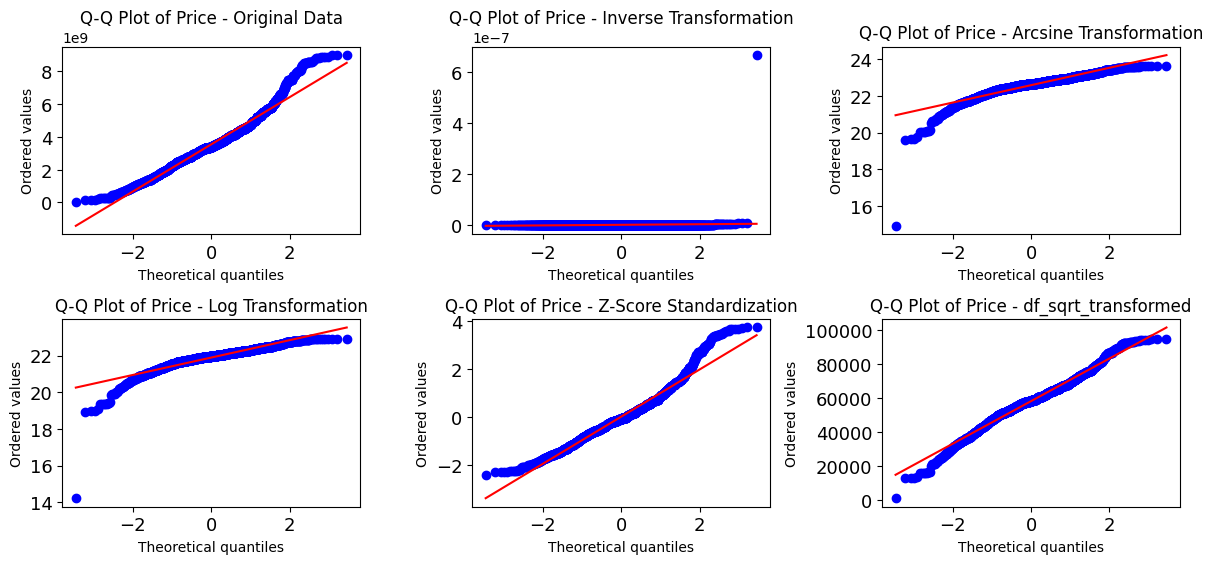

In [13]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Price'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Price - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Area (m²)* feature when applying normalization methods

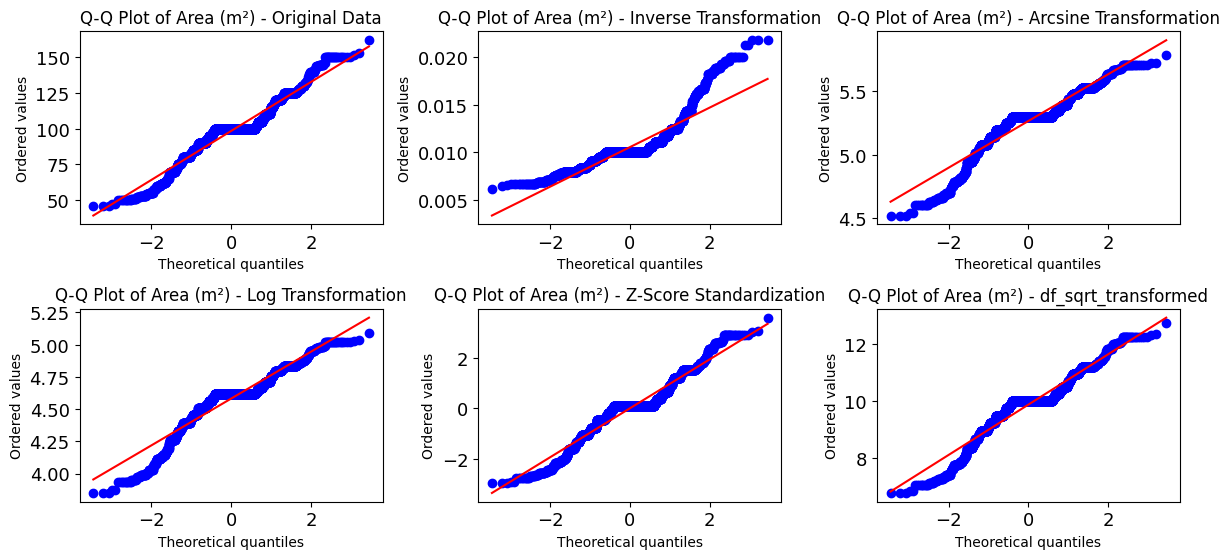

In [14]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Area (m²)'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Area (m²) - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Width (m)* feature when applying normalization methods

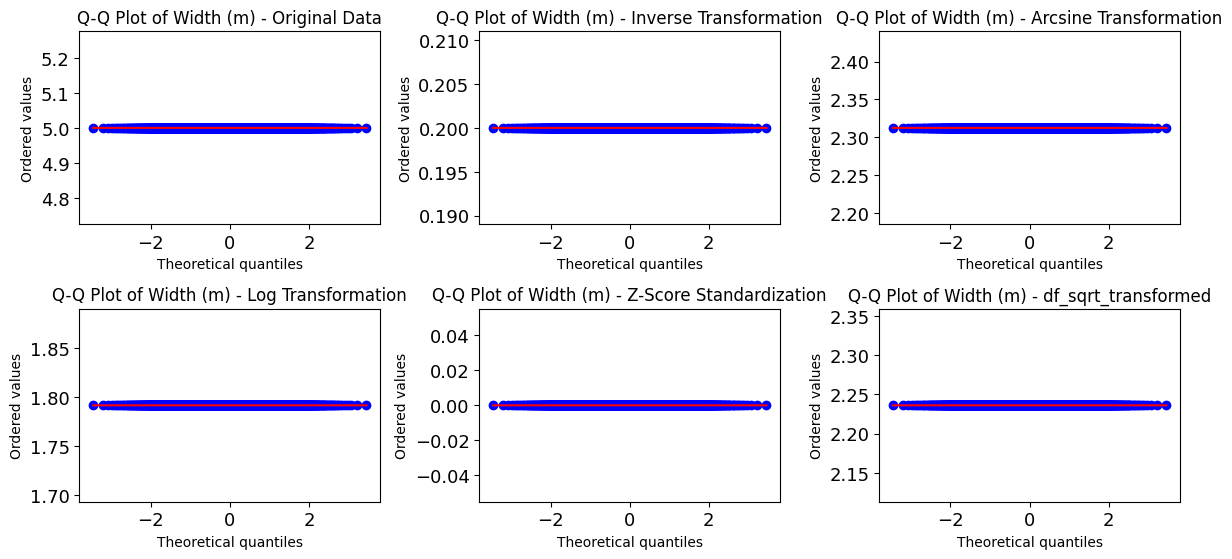

In [15]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Width (m)'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Width (m) - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Longitude* feature when applying normalization methods

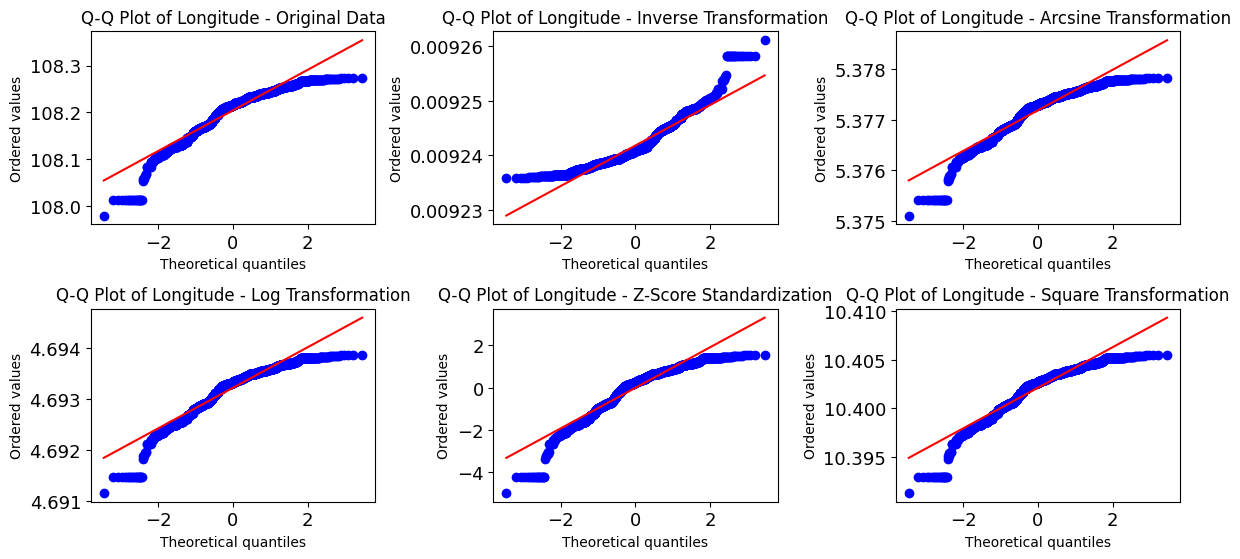

In [16]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Longitude'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Longitude - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Latitude* feature when applying normalization methods

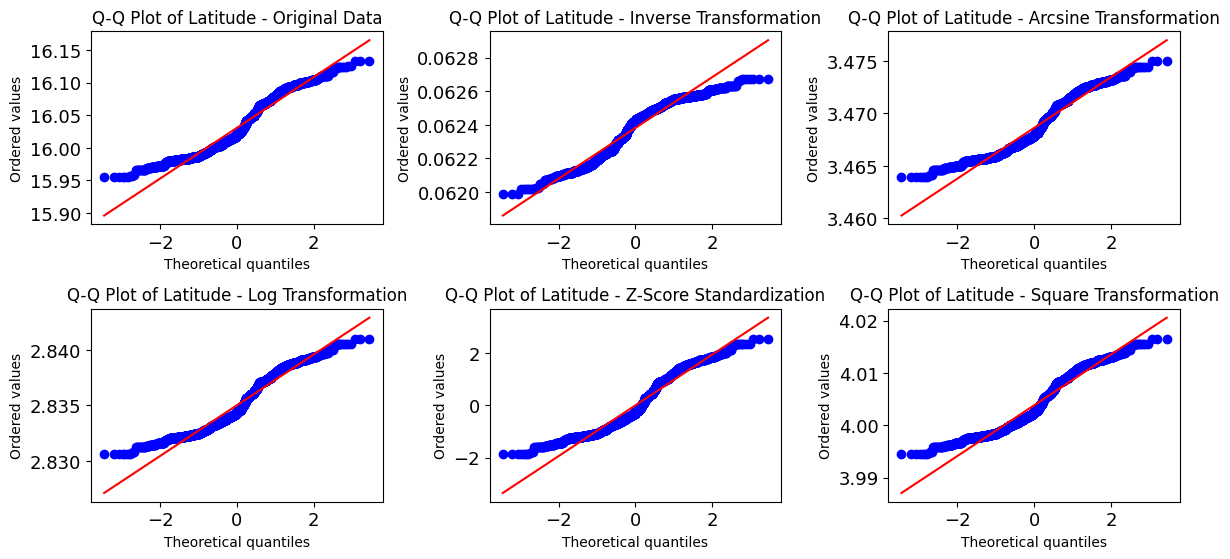

In [17]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Latitude'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Latitude - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

*The characteristic that follows the most normal distribution is standardized by the square root method.*

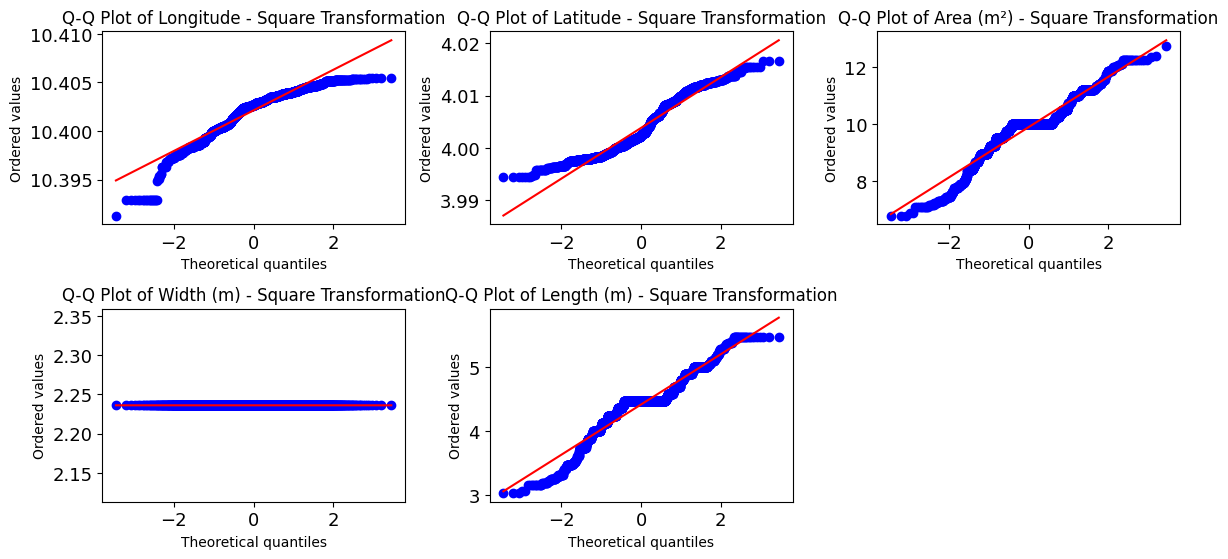

In [18]:
cols = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) 
    stats.probplot(df_sqrt_transformed[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col} - Square Transformation")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Compares distribution of characteristics *Length (m)* when applying standardized methods

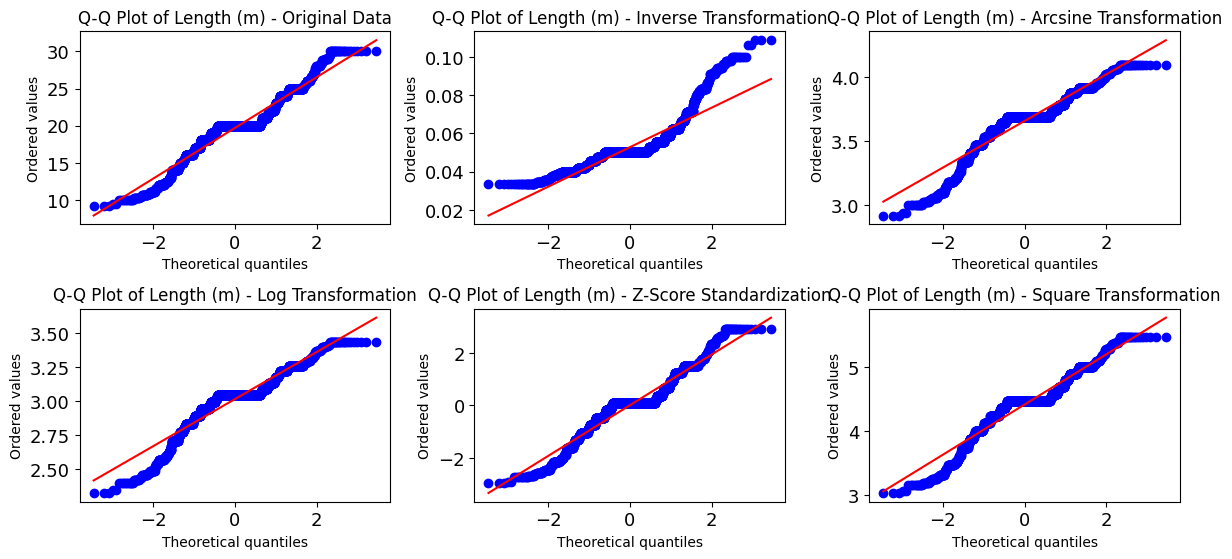

In [19]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data["Length (m)"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Length (m) - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

=> Select Z-Score normalization method for feature *Length (m)* & *Price* and square root method for features *Longitude", Latitude, Area (m²), Width (m)*

In [20]:
df_final = df.copy()

df_final["Length (m)"] = df_std_scaled_zScore["Length (m)"]
df_final["Price"] = df_std_scaled_zScore["Price"]

columns_sqrt = ["Longitude", "Latitude", "Area (m²)", "Width (m)"]
df_final[columns_sqrt] = df_sqrt_transformed[columns_sqrt]

df_final.head()


,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,0.932769,4,6,8.0,-2.310335,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.086461,4,5,6.0,-2.252332,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.086461,4,5,4.0,-2.252332,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-1.324053,4,6,4.0,-2.231861,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.907489,1,1,5.0,-2.139739,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


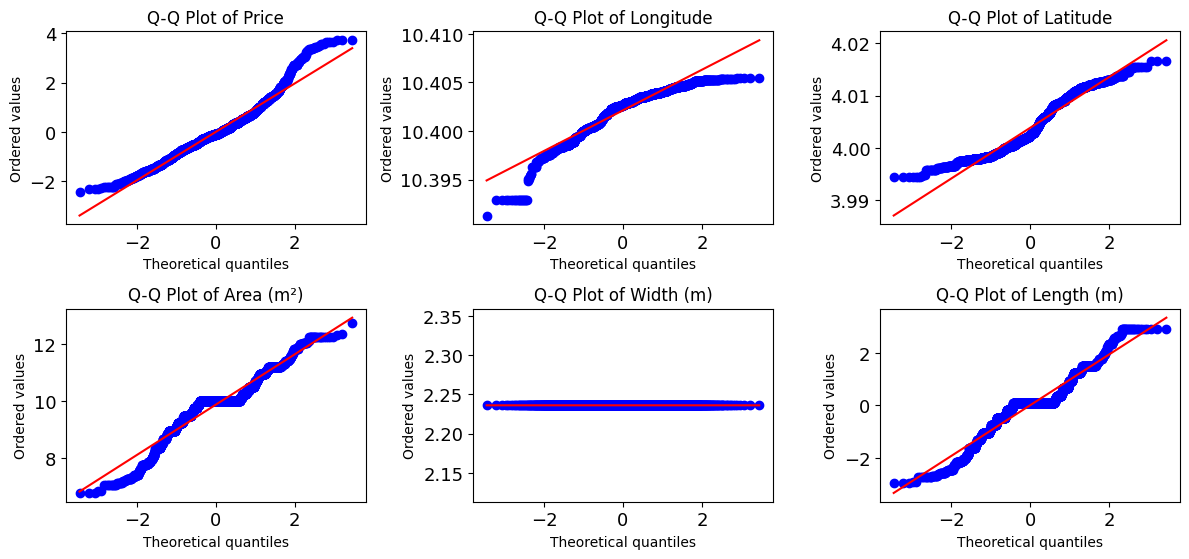

In [21]:
cols = ["Price", "Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) 
    stats.probplot(df_final[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

In [22]:
df_final.to_csv('TransformedData.csv', index=False)
print("Đã xuất DataFrame ra file CSV.")

Đã xuất DataFrame ra file CSV.
